# Data pre-processing & Modeling

## Imports

### Library

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt

from sklearn.model_selection import train_test_split
%matplotlib inline

### Data

In [2]:
# Importing data from post-EDA saved file.
df = pd.read_csv('./data/post_EDA_df.csv')

# Setting 'Date' column as index
df.set_index('Date', inplace=True)

In [3]:
# DataFrame check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 2011-01-03 to 2021-12-30
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Adj_Close_AAPL                  2768 non-null   float64
 1   Volume_AAPL                     2768 non-null   int64  
 2   VWAP_AAPL                       2768 non-null   float64
 3   Adj_Close_AMZN                  2768 non-null   float64
 4   Volume_AMZN                     2768 non-null   int64  
 5   VWAP_AMZN                       2768 non-null   float64
 6   Adj_Close_GOOG                  2768 non-null   float64
 7   Volume_GOOG                     2768 non-null   int64  
 8   VWAP_GOOG                       2768 non-null   float64
 9   Adj_Close_MSFT                  2768 non-null   float64
 10  Volume_MSFT                     2768 non-null   int64  
 11  VWAP_MSFT                       2768 non-null   float64
 12  Adj_Close_QQQ           

## Data preprocessing

### Dropping log % change columns
These columns were engineered for EDA and would not be used for modeling.

In [4]:
# Dropping log daily percentage change & log daily VWAP percentage change columns.
df = df.drop(columns=['log_AAPL_daily_pct_change', 'log_AMZN_daily_pct_change', 'log_GOOG_daily_pct_change', 'log_MSFT_daily_pct_change', 'log_QQQ_daily_pct_change',
                     'log_SPY_daily_pct_change', 'log_VIX_daily_pct_change', 'log_TSLA_daily_pct_change', 'log_AAPL_daily_VWAP_pct_change', 'log_AMZN_daily_VWAP_pct_change',
                     'log_GOOG_daily_VWAP_pct_change', 'log_MSFT_daily_VWAP_pct_change', 'log_QQQ_daily_VWAP_pct_change', 'log_SPY_daily_VWAP_pct_change',
                     'log_TSLA_daily_VWAP_pct_change'])

In [5]:
# Dataframe check after dropping columns in the above cell.
df.head(2)

,Adj_Close_AAPL,Volume_AAPL,VWAP_AAPL,Adj_Close_AMZN,Volume_AMZN,VWAP_AMZN,Adj_Close_GOOG,Volume_GOOG,VWAP_GOOG,Adj_Close_MSFT,...,SPY_daily_pct_change,TSLA_daily_pct_change,VIX_daily_pct_change,AAPL_daily_VWAP_pct_change,AMZN_daily_VWAP_pct_change,GOOG_daily_VWAP_pct_change,MSFT_daily_VWAP_pct_change,QQQ_daily_VWAP_pct_change,SPY_daily_VWAP_pct_change,TSLA_daily_VWAP_pct_change
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,10.091493,445138400,11.722262,184.220001,5331400,183.810003,301.04660,4748131,299.945730,22.061134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,10.144161,309080800,11.808810,185.009995,5031800,185.496663,299.93576,3662677,300.277822,22.147865,...,-0.05508,0.187833,-1.306084,0.738318,0.917611,0.110717,0.035681,-0.126546,0.049957,0.150906


### Filling the first row of % change with 0
Resulting dataframe from the above will have the first row of daily adjusted closing price and daily VWAP price cells as Null value due to percentage change calculation.

In [6]:
# Filling in the null values with 0 as there is 0% change for the first row values in percentage change calculation
df.fillna(value=0, inplace=True)

# Dataframe Null value check: making sure no null values. 
df.isnull().sum()

Adj_Close_AAPL                0
Volume_AAPL                   0
VWAP_AAPL                     0
Adj_Close_AMZN                0
Volume_AMZN                   0
VWAP_AMZN                     0
Adj_Close_GOOG                0
Volume_GOOG                   0
VWAP_GOOG                     0
Adj_Close_MSFT                0
Volume_MSFT                   0
VWAP_MSFT                     0
Adj_Close_QQQ                 0
Volume_QQQ                    0
VWAP_QQQ                      0
Adj_Close_SPY                 0
Volume_SPY                    0
VWAP_SPY                      0
Adj_Close_TSLA                0
Volume_TSLA                   0
VWAP_TSLA                     0
Adj_Close_VIX                 0
log_Adj_Close_AAPL            0
log_Adj_Close_AMZN            0
log_Adj_Close_GOOG            0
log_Adj_Close_MSFT            0
log_Adj_Close_QQQ             0
log_Adj_Close_SPY             0
log_Adj_Close_TSLA            0
log_Adj_Close_VIX             0
log_VWAP_AAPL                 0
log_VWAP

In [7]:
# Looking at the first two rows of the dataframe. Notice the cells pertaining to % change are filled with 0.
df.head(2)

,Adj_Close_AAPL,Volume_AAPL,VWAP_AAPL,Adj_Close_AMZN,Volume_AMZN,VWAP_AMZN,Adj_Close_GOOG,Volume_GOOG,VWAP_GOOG,Adj_Close_MSFT,...,SPY_daily_pct_change,TSLA_daily_pct_change,VIX_daily_pct_change,AAPL_daily_VWAP_pct_change,AMZN_daily_VWAP_pct_change,GOOG_daily_VWAP_pct_change,MSFT_daily_VWAP_pct_change,QQQ_daily_VWAP_pct_change,SPY_daily_VWAP_pct_change,TSLA_daily_VWAP_pct_change
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,10.091493,445138400,11.722262,184.220001,5331400,183.810003,301.04660,4748131,299.945730,22.061134,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-04,10.144161,309080800,11.808810,185.009995,5031800,185.496663,299.93576,3662677,300.277822,22.147865,...,-0.05508,0.187833,-1.306084,0.738318,0.917611,0.110717,0.035681,-0.126546,0.049957,0.150906


### Splitting Dataset

#### Splitting for Time-Series modeling

In [8]:
# finding out length of the entire dataframe. will be performing 80:20 split.
len(df), round(len(df)*0.8), round(len(df)*0.2)

(2768, 2214, 554)

In [9]:
ts_train = df.iloc[:2214]
ts_test = df.iloc[2214:]

In [10]:
# Checking tail/train and head/test to see connectivity. 
ts_train.tail(2)

,Adj_Close_AAPL,Volume_AAPL,VWAP_AAPL,Adj_Close_AMZN,Volume_AMZN,VWAP_AMZN,Adj_Close_GOOG,Volume_GOOG,VWAP_GOOG,Adj_Close_MSFT,...,SPY_daily_pct_change,TSLA_daily_pct_change,VIX_daily_pct_change,AAPL_daily_VWAP_pct_change,AMZN_daily_VWAP_pct_change,GOOG_daily_VWAP_pct_change,MSFT_daily_VWAP_pct_change,QQQ_daily_VWAP_pct_change,SPY_daily_VWAP_pct_change,TSLA_daily_VWAP_pct_change
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-17,57.785580,67585200,58.745833,1787.47998,2647400,1789.449992,1253.069946,952400,1255.444946,136.611832,...,0.294894,0.854668,0.804091,0.304492,0.640395,0.789570,-0.190056,0.321246,0.285877,1.046525
2019-10-18,58.063122,97433600,59.023333,1757.51001,3362500,1766.896647,1245.489990,1352800,1248.486654,134.382065,...,-0.437692,-1.916253,3.335751,0.472374,-1.260351,-0.554249,-1.466214,-0.824638,-0.405325,-1.533829


In [11]:
# Checking tail/train and head/test to see connectivity. 
ts_test.head(2)

,Adj_Close_AAPL,Volume_AAPL,VWAP_AAPL,Adj_Close_AMZN,Volume_AMZN,VWAP_AMZN,Adj_Close_GOOG,Volume_GOOG,VWAP_GOOG,Adj_Close_MSFT,...,SPY_daily_pct_change,TSLA_daily_pct_change,VIX_daily_pct_change,AAPL_daily_VWAP_pct_change,AMZN_daily_VWAP_pct_change,GOOG_daily_VWAP_pct_change,MSFT_daily_VWAP_pct_change,QQQ_daily_VWAP_pct_change,SPY_daily_VWAP_pct_change,TSLA_daily_VWAP_pct_change
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-21,59.070091,87247200,59.901667,1785.660034,2130400,1778.846680,1246.150024,1027200,1247.126343,135.379593,...,0.677895,-1.342671,-1.754386,1.488113,0.676329,-0.108957,-0.007250,0.517297,0.529963,-1.506098
2019-10-22,58.935013,82293600,60.148333,1765.729980,2111700,1772.503337,1242.800049,1023800,1244.926676,133.364960,...,-0.326666,0.820514,3.285715,0.411785,-0.356599,-0.176379,-0.314056,-0.170971,-0.035587,0.207027


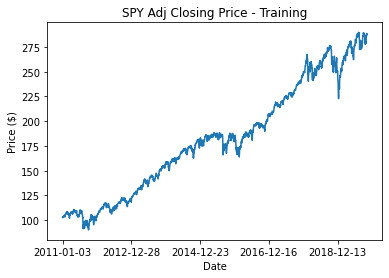

In [12]:
# Quick graph check. Refer to EDA notebook for individual graphs
ts_train['Adj_Close_SPY'].plot()
plt.title('SPY Adj Closing Price - Training')
plt.ylabel('Price ($)');

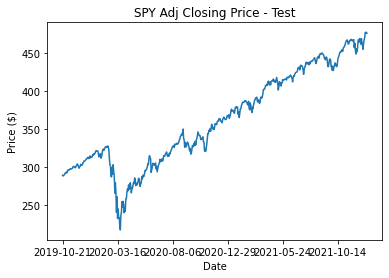

In [13]:
# Quick graph check. Refer to EDA notebook for individual graphs
ts_test['Adj_Close_SPY'].plot()
plt.title('SPY Adj Closing Price - Test')
plt.ylabel('Price ($)');

## Time-Series

In [14]:
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Aguented Dickey-Fuller Test

- Used to test for a unit root in a univariate process in the presence of serial correlation.
- It is a hypothesis test that tests for **stationarity**. An assumption is made that the data are not stationary. With enough evidence, we may accept taht the data are stationary. 
- Returns: adf (test stat.), p-value, usedlag, nobs, critical values (dict), icbest, resstore.
- If Test statistic (adf) < Critical values (dict), we can reject Null Hypothesis at that level of significance.

$$
\begin{eqnarray}
&H_0:& \text{not stationary} \\
&H_A:& \text{stationary}
\end{eqnarray}
$$
More information can be obtained from:
```python
help(adfuller)
```

Stock prices will be tested for stationarity using ADFuller Test.
- $p$-value is compared to $\alpha$, which us often set at 0.10, 0.05, or 0.01. 
- Here, $\alpha$ will be set as 0.05. **5% significance**. 
- If $p$-value > $\alpha$, we cannot accept accept that the given series is stationary: cannot reject null hypothesis.

References:
- https://machinelearningmastery.com/time-series-data-stationary-python/
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [15]:
# Building a function to interpret Augmented Dickey-Fuller Test Results.
# Code modified from a reference code learned from the class. Reference: written by J. Nelson.

def adf_test_results(df):
    test_result = pd.Series(df[0:2], index=['Test Statistic (adf)', 'p-value'])
    return test_result

In [16]:
ticker_list = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'QQQ', 'SPY', 'TSLA']

# Building a function that returns a dataframe with the index as ticker name and columns for test stats and p-values.
def adf_results(ticker_list):
    # Empty lists as placeholder. Results will be added here
    test_stats = []
    p_values = []
    test_stats_vwap = []
    p_values_vwap = []
    
    for ticker in ticker_list:
        # Codes that will add results to the above lists - Adj Close Price
        test_stats.append(adf_test_results(adfuller(ts_train[f'Adj_Close_{ticker}']))[0])
        p_values.append(adf_test_results(adfuller(ts_train[f'Adj_Close_{ticker}']))[1])
        # VWAP
        test_stats_vwap.append(adf_test_results(adfuller(ts_train[f'VWAP_{ticker}']))[0])
        p_values_vwap.append(adf_test_results(adfuller(ts_train[f'VWAP_{ticker}']))[1])
        
    # Code that will return the results as a dataframe. 
    return pd.DataFrame(list(zip(test_stats, p_values, test_stats_vwap, p_values_vwap)), columns=['Test_Stat_(Adj_close)', 'p-value_(Adj_close)', 'Test_Stat_(VWAP)', 'p-value_(VWAP)'], index=ticker_list)

df_adf = adf_results(ticker_list)

In [17]:
df_adf['Hypothesis_Adj_Close'] = ['Reject' if p>0.05 else 'Accept' for p in df_adf['p-value_(Adj_close)']]
df_adf['Hypothesis_VWAP'] = ['Reject' if p>0.05 else 'Accept' for p in df_adf['p-value_(VWAP)']]

# Reordering the columns
df_adf = df_adf[['Test_Stat_(Adj_close)', 'p-value_(Adj_close)', 'Hypothesis_Adj_Close', 'Test_Stat_(VWAP)', 'p-value_(VWAP)', 'Hypothesis_VWAP']]
# ADF test results 
df_adf

,Test_Stat_(Adj_close),p-value_(Adj_close),Hypothesis_Adj_Close,Test_Stat_(VWAP),p-value_(VWAP),Hypothesis_VWAP
AAPL,0.192695,0.971849,Reject,-0.043369,0.954795,Reject
AMZN,0.395822,0.981338,Reject,0.488344,0.984514,Reject
GOOG,0.080608,0.964712,Reject,0.203343,0.972448,Reject
MSFT,2.817629,1.000000,Reject,2.542088,0.999062,Reject
QQQ,0.591425,0.987402,Reject,0.395331,0.981319,Reject
SPY,0.191992,0.971809,Reject,-0.135185,0.945819,Reject
TSLA,-1.689426,0.436569,Reject,-1.592528,0.487346,Reject


In [18]:
# VIX ADFuller test results
adf_test_results(adfuller(ts_train['Adj_Close_VIX']))[0], adf_test_results(adfuller(ts_train['Adj_Close_VIX']))[1]

(-4.531120613060356, 0.00017268805308607435)

In [39]:
# Manually adding VIX ADFuller results to the df_adf.
VIX_row = pd.Series({'Test_Stat_(Adj_close)':adf_test_results(adfuller(ts_train['Adj_Close_VIX']))[0], 
                     'p-value_(Adj_close)':adf_test_results(adfuller(ts_train['Adj_Close_VIX']))[1],
                    'Hypothesis_Adj_Close':'Accept'}, name='VIX')
df_adf = df_adf.append(VIX_row)
df_adf

,Test_Stat_(Adj_close),p-value_(Adj_close),Hypothesis_Adj_Close,Test_Stat_(VWAP),p-value_(VWAP),Hypothesis_VWAP
AAPL,0.192695,0.971849,Reject,-0.043369,0.954795,Reject
AMZN,0.395822,0.981338,Reject,0.488344,0.984514,Reject
GOOG,0.080608,0.964712,Reject,0.203343,0.972448,Reject
MSFT,2.817629,1.000000,Reject,2.542088,0.999062,Reject
QQQ,0.591425,0.987402,Reject,0.395331,0.981319,Reject
SPY,0.191992,0.971809,Reject,-0.135185,0.945819,Reject
TSLA,-1.689426,0.436569,Reject,-1.592528,0.487346,Reject
VIX,-4.531121,0.000173,Accept,NaN,NaN,NaN


As seen in the above dataframe, all stocks show extremely high $p$-value, suggesting that:
1. We cannot reject the null hypothesis and the **data (Stock Prices) are non-stationary**.; We would need an integraded model for forecasting.
2. VIX shows extremely low $p$-value of 0.000173. We can reject the null hypothesis and accept the alternative hypothesis at **5% significance ($\alpha$ = 0.05)** that VIX is stationary.
3. Again, there is no traded volume on VIX in the dataset obtained from Yahoo Finance. Hence, there is no VWAP calculated for VIX. 

Insight on VIX: 
- VIX is Chicago Board Options Exchange Volatility Index. 
- While it is not essentialy an inverse of the market performance, it often shows the inverse relationship with the general market performance. 
- VIX goes down when the market performs well, indicating the market is stable. VIX goes up when the market is performing poorly and there is increased volatility. 

#### Differencing Data for Stationarity
As observed in the above, our data is non-stationary (except VIX) at this time. Will diffrence the data for stationarity. 

In [75]:
# Creating a copy of the original dataframe for diffrencing
df_for_diff = df.copy()

# First-Differencing dataframe and dropping null values
df_for_diff = df_for_diff.diff().dropna()

In [77]:
# Quick resulting dataframe check. Notice the first row is 2011-01-04 now, instead of 2011-01-03.
df_for_diff.head(2)

,Adj_Close_AAPL,Volume_AAPL,VWAP_AAPL,Adj_Close_AMZN,Volume_AMZN,VWAP_AMZN,Adj_Close_GOOG,Volume_GOOG,VWAP_GOOG,Adj_Close_MSFT,...,SPY_daily_pct_change,TSLA_daily_pct_change,VIX_daily_pct_change,AAPL_daily_VWAP_pct_change,AMZN_daily_VWAP_pct_change,GOOG_daily_VWAP_pct_change,MSFT_daily_VWAP_pct_change,QQQ_daily_VWAP_pct_change,SPY_daily_VWAP_pct_change,TSLA_daily_VWAP_pct_change
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.052669,-136057600.0,0.086548,0.789993,-299600.0,1.686661,-1.110840,-1085454.0,0.332092,0.086731,...,-0.055080,0.187833,-1.306084,0.738318,0.917611,0.110717,0.035681,-0.126546,0.049957,0.150906
2011-01-05,0.082977,-53561200.0,0.070237,2.410004,-1613000.0,0.816671,3.462036,1420906.0,1.831472,-0.070967,...,0.574836,0.412093,-0.765255,-0.143529,-0.477349,0.499208,-0.428024,0.627331,0.286405,0.200677


In [87]:
ticker_list = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'QQQ', 'SPY', 'TSLA']

# Building a function that returns a dataframe with the index as ticker name and columns for test stats and p-values.
def adf_results_diff(ticker_list):
    # Empty lists as placeholder. Results will be added here
    test_stats_diff = []
    p_values_diff = []
    test_stats_vwap_diff = []
    p_values_vwap_diff = []
    
    for ticker in ticker_list:
        # Codes that will add results to the above lists - Adj Close Price
        test_stats_diff.append(adf_test_results(adfuller(df_for_diff[f'Adj_Close_{ticker}']))[0])
        p_values_diff.append(adf_test_results(adfuller(df_for_diff[f'Adj_Close_{ticker}']))[1])
        # VWAP
        test_stats_vwap_diff.append(adf_test_results(adfuller(df_for_diff[f'VWAP_{ticker}']))[0])
        p_values_vwap_diff.append(adf_test_results(adfuller(df_for_diff[f'VWAP_{ticker}']))[1])
        
    # Code that will return the results as a dataframe. 
    return pd.DataFrame(list(zip(test_stats_diff, p_values_diff, test_stats_vwap_diff, p_values_vwap_diff)), columns=['Test_Stat_(Adj_close)_diff', 'p-value_(Adj_close)_diff', 'Test_Stat_(VWAP)_diff', 'p-value_(VWAP)_diff'], index=ticker_list)

df_adf_diff = adf_results_diff(ticker_list)

In [88]:
df_adf_diff['Hypothesis_Adj_Close_diff'] = ['Reject' if p>0.05 else 'Accept' for p in df_adf_diff['p-value_(Adj_close)_diff']]
df_adf_diff['Hypothesis_VWAP_diff'] = ['Reject' if p>0.05 else 'Accept' for p in df_adf_diff['p-value_(VWAP)_diff']]

# Reordering the columns
df_adf_diff = df_adf_diff[['Test_Stat_(Adj_close)_diff', 'p-value_(Adj_close)_diff', 'Hypothesis_Adj_Close_diff', 'Test_Stat_(VWAP)_diff', 'p-value_(VWAP)_diff', 'Hypothesis_VWAP_diff']]

# Manually adding VIX ADFuller results to the df_adf.
VIX_row = pd.Series({'Test_Stat_(Adj_close)_diff':adf_test_results(adfuller(df_for_diff['Adj_Close_VIX']))[0], 
                     'p-value_(Adj_close)_diff':adf_test_results(adfuller(df_for_diff['Adj_Close_VIX']))[1],
                    'Hypothesis_Adj_Close_diff':'Accept'}, name='VIX')
df_adf_diff = df_adf_diff.append(VIX_row)

# First-Differenced ADF test results 
df_adf_diff

,Test_Stat_(Adj_close)_diff,p-value_(Adj_close)_diff,Hypothesis_Adj_Close_diff,Test_Stat_(VWAP)_diff,p-value_(VWAP)_diff,Hypothesis_VWAP_diff
AAPL,-9.977448,2.158722e-17,Accept,-9.135621,2.941233e-15,Accept
AMZN,-12.271639,8.613920e-23,Accept,-12.163043,1.478570e-22,Accept
GOOG,-11.501078,4.490178e-21,Accept,-10.666556,4.272548e-19,Accept
MSFT,-13.656420,1.550678e-25,Accept,-13.714356,1.220812e-25,Accept
QQQ,-12.945363,3.464890e-24,Accept,-12.943558,3.493685e-24,Accept
SPY,-11.219334,2.031932e-20,Accept,-11.261913,1.614215e-20,Accept
TSLA,-9.863107,4.182127e-17,Accept,-9.921775,2.977837e-17,Accept
VIX,-12.301656,7.426742e-23,Accept,NaN,NaN,NaN


As seen in the above, after first-differencing, we are noticing extremely low $p$-values (lower than $\alpha$), suggesting that:
1. We can reject the null hypothesis and state the **data (Stock Prices) are stationary after first-differencing**.
2. Again, there is no traded volume on VIX in the dataset obtained from Yahoo Finance. Hence, there is no VWAP calculated for VIX.

### ARIMA/Auto ARIMA/SARIMA models
AutoRegressive Integrated Moving Average model is a statistical analysis model that the future trend based on the provided historical time-series data. <br>
In order to find the best performing model, **AR(p), I(d), MA(q)** values are differentiated and fitted. This process is usually done manually in the class settings. Here, the process will be automated using **Auto-ARIMA model**.

- AutoRegressive (p): the number of lag observations in the model; also known as the lag order (AR)
- Integrated (d): Frequency of differentiation of raw observations.
- Moving Average (q): Order of Moving Average.

Expectation: The correct model would yield the highest Log-Likelihood and require the lowest AIC. 

In [20]:
#!pip install pmdarima
from pmdarima import auto_arima

#### AAPL

In [21]:
model_AAPL = auto_arima(ts_train['Adj_Close_AAPL'])
model_AAPL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1476.905
Date:                Sun, 30 Jan 2022   AIC                           2957.811
Time:                        18:10:01   BIC                           2969.215
Sample:                             0   HQIC                          2961.977
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0217      0.010      2.133      0.033       0.002       0.042
sigma2         0.2224      0.003     75.959      0.000       0.217       0.228
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              7102.34
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               6.52   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### AMZN

In [22]:
model_AMZN = auto_arima(ts_train['Adj_Close_AMZN'])
model_AMZN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -9352.309
Date:                Sun, 30 Jan 2022   AIC                          18718.619
Time:                        18:10:17   BIC                          18758.533
Sample:                             0   HQIC                         18733.199
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7143      0.319      2.240      0.025       0.089       1.339
ar.L1          1.0599      0.015     68.670      0.000       1.030       1.090
ar.L2         -0.9674      0.014    -70.794      0.000      -0.994      -0.941
ar.L3         -0.0033      0.009     -0.384      0.701      -0.020       0.014
ma.L1         -1.0783      0.013    -85.510      0.000      -1.103      -1.054
ma.L2          0.9654      0.013     76.520      0.000       0.941       0.990
sigma2       275.6458      3.021     91.238      0.000     269.724     281.567
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             20172.51
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              30.84   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### GOOG

In [23]:
model_GOOG = auto_arima(ts_train['Adj_Close_GOOG'])
model_GOOG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -8463.660
Date:                Sun, 30 Jan 2022   AIC                          16939.321
Time:                        18:10:28   BIC                          16973.533
Sample:                             0   HQIC                         16951.819
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1105      0.053      2.104      0.035       0.008       0.213
ar.L1          0.1775      0.123      1.448      0.148      -0.063       0.418
ar.L2          0.5616      0.121      4.646      0.000       0.325       0.798
ma.L1         -0.1746      0.117     -1.494      0.135      -0.404       0.054
ma.L2         -0.6365      0.116     -5.477      0.000      -0.864      -0.409
sigma2       122.8746      1.260     97.545      0.000     120.406     125.344
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             21787.03
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               8.78   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### MSFT

In [24]:
model_MSFT = auto_arima(ts_train['Adj_Close_MSFT'])
model_MSFT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -3081.689
Date:                Sun, 30 Jan 2022   AIC                           6175.377
Time:                        18:10:31   BIC                           6209.587
Sample:                             0   HQIC                          6187.875
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8904      0.011    -77.709      0.000      -0.913      -0.868
ar.L2         -0.7747      0.014    -54.366      0.000      -0.803      -0.747
ar.L3         -0.5092      0.018    -29.012      0.000      -0.544      -0.475
ar.L4         -0.3337      0.016    -20.329      0.000      -0.366      -0.302
ar.L5         -0.1943      0.012    -16.342      0.000      -0.218      -0.171
sigma2         0.9492      0.012     76.782      0.000       0.925       0.973
===================================================================================
Ljung-Box (L1) (Q):                   3.61   Jarque-Bera (JB):              9065.69
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):              13.47   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### QQQ

In [25]:
model_QQQ = auto_arima(ts_train['Adj_Close_QQQ'])
model_QQQ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -3582.004
Date:                Sun, 30 Jan 2022   AIC                           7184.008
Time:                        18:11:09   BIC                           7241.029
Sample:                             0   HQIC                          7204.838
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0120      0.004      3.029      0.002       0.004       0.020
ar.L1         -0.5378      0.093     -5.759      0.000      -0.721      -0.355
ar.L2          0.0452      0.061      0.741      0.459      -0.074       0.165
ar.L3          0.5619      0.048     11.720      0.000       0.468       0.656
ar.L4          0.7400      0.064     11.510      0.000       0.614       0.866
ma.L1          0.5078      0.093      5.449      0.000       0.325       0.690
ma.L2         -0.1269      0.064     -1.976      0.048      -0.253      -0.001
ma.L3         -0.5539      0.053    -10.551      0.000      -0.657      -0.451
ma.L4         -0.7281      0.062    -11.655      0.000      -0.851      -0.606
sigma2         1.4900      0.023     63.789      0.000       1.444       1.536
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              4303.23
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               7.93   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### SPY

In [26]:
model_SPY = auto_arima(ts_train['Adj_Close_SPY'])
model_SPY.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4195.220
Date:                Sun, 30 Jan 2022   AIC                           8398.439
Time:                        18:11:13   BIC                           8421.247
Sample:                             0   HQIC                          8406.771
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0034      0.001      3.229      0.001       0.001       0.005
ar.L1          0.9591      0.012     80.392      0.000       0.936       0.983
ma.L1         -0.9807      0.009   -110.784      0.000      -0.998      -0.963
sigma2         2.5945      0.044     59.558      0.000       2.509       2.680
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):              3334.03
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               3.31   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### TSLA

In [27]:
model_TSLA = auto_arima(ts_train['Adj_Close_TSLA'])
model_TSLA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3655.957
Date:                Sun, 30 Jan 2022   AIC                           7313.913
Time:                        18:11:15   BIC                           7319.615
Sample:                             0   HQIC                          7315.996
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.5939      0.021     77.054      0.000       1.553       1.634
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):              7040.11
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               9.76   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### VIX

In [28]:
model_VIX = auto_arima(ts_train['Adj_Close_VIX'])
model_VIX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4117.057
Date:                Sun, 30 Jan 2022   AIC                           8244.114
Time:                        18:11:28   BIC                           8272.624
Sample:                             0   HQIC                          8254.528
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0525      0.044     -1.197      0.231      -0.138       0.033
ar.L2          0.7479      0.033     22.394      0.000       0.682       0.813
ma.L1         -0.0758      0.045     -1.668      0.095      -0.165       0.013
ma.L2         -0.7985      0.039    -20.286      0.000      -0.876      -0.721
sigma2         2.4176      0.022    111.617      0.000       2.375       2.460
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             73164.82
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             2.84
Prob(H) (two-sided):                  0.01   Kurtosis:                        30.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
from prophet import Prophet

## Vector Autoregression Model
VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. <br>
Here, the original dataset will be investigated followed by first-differenced dataset. 

Reference: https://www.statsmodels.org/dev/vector_ar.html#var

### Original Data - Without Differencing

In [34]:
from statsmodels.tsa.api import VAR

#### Creating a new dataframe with adjusted closing prices only for VAR

In [40]:
# Creating a dataframe with adjusted closing prices only for VAR.
df_var = df[['Adj_Close_AAPL', 'Adj_Close_AMZN', 'Adj_Close_GOOG', 'Adj_Close_MSFT', 'Adj_Close_QQQ', 'Adj_Close_SPY', 'Adj_Close_TSLA', 'Adj_Close_VIX']]

#### Instantiate VAR, set maxlags, fitting and summary of the VAR model

In [41]:
# Instantiate VAR
model_VAR = VAR(df_var)

In [42]:
# Compute lag order selections based on each of the available information criteria
# Setting Maxlags = 20 and constant terms.
model_VAR.select_order(20)

In [43]:
# Fitting VAR model. Information Criterion: Akaike
results_VAR = model_VAR.fit(ic = 'aic')

# Summary of VAR
results_VAR.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jan, 2022
Time:                     21:09:19
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    18.6059
Nobs:                     2740.00    HQIC:                   16.1240
Log likelihood:          -49469.1    FPE:                2.47725e+06
AIC:                      14.7197    Det(Omega_mle):     1.31758e+06
--------------------------------------------------------------------
Results for equation Adj_Close_AAPL
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.419234         0.263718            1.590           0.112
L1.Adj_Close_AAPL          1.023494         0.033729           30.344           0.000
L1.Adj_Close_AMZN         -0.00

<Figure size 72000x72000 with 0 Axes>

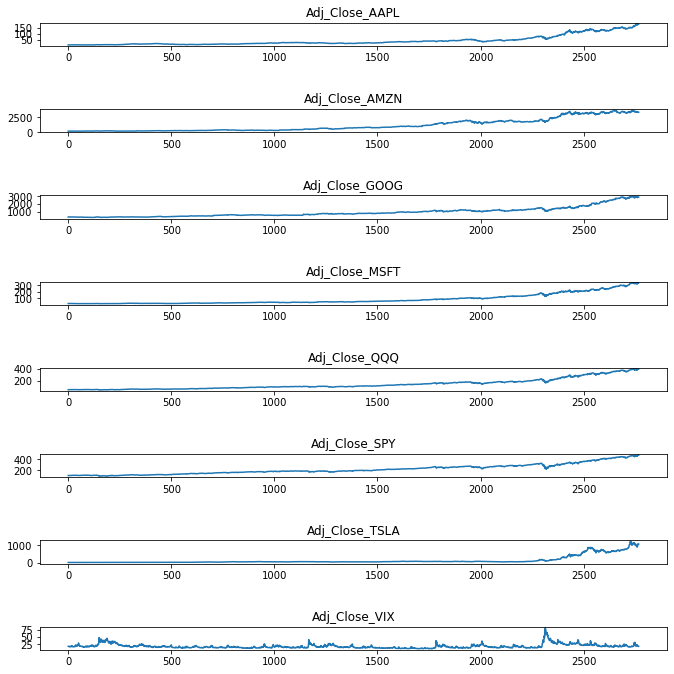

In [58]:
fig = plt.figure(figsize=(8,6))
fig.set_size_inches(1000, 1000)
results_VAR.plot()
plt.tight_layout(pad = 3.0)

#### VAR Forecast

<Figure size 72000x72000 with 0 Axes>

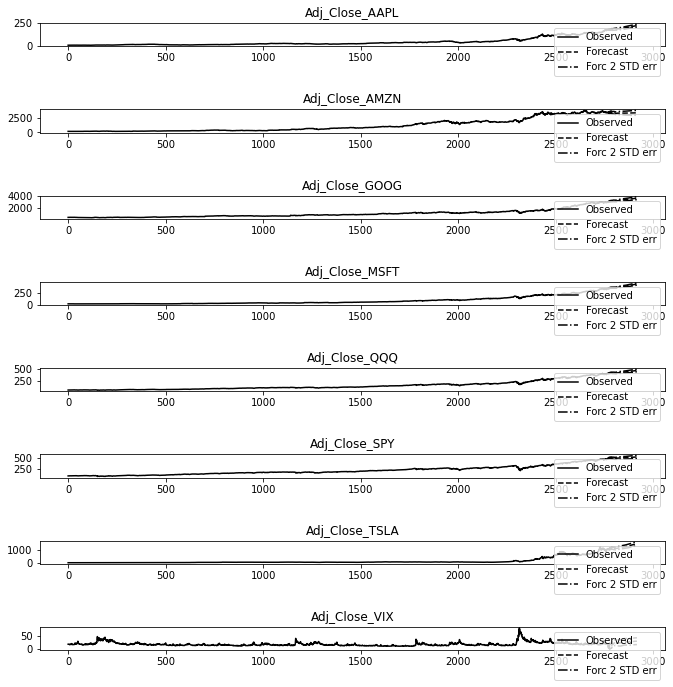

In [96]:
fig = plt.figure(figsize=(8,6))
fig.set_size_inches(1000, 1000)
results_VAR.plot_forecast(150)
plt.tight_layout(pad = 3.0)

### With First-Differencing
In the above ADFuller test section, the dataset was first-differenced and stationarity was observed. VAR will be performed on teh first-differenced data. 

#### Creating a new dataframe with adjusted closing prices only for VAR - First-Differenced Data

In [90]:
# Creating a dataframe with adjusted closing prices only for VAR.
df_var_diff = df_for_diff[['Adj_Close_AAPL', 'Adj_Close_AMZN', 'Adj_Close_GOOG', 'Adj_Close_MSFT', 'Adj_Close_QQQ', 'Adj_Close_SPY', 'Adj_Close_TSLA', 'Adj_Close_VIX']]

#### Instantiate VAR, set maxlags, fitting and summary of the VAR model - First-Differenced Data

In [91]:
# Instantiate VAR
model_VAR_diff = VAR(df_var_diff)

In [92]:
# Compute lag order selections based on each of the available information criteria
# Setting Maxlags = 20 and constant terms.
model_VAR_diff.select_order(20)

In [94]:
# Fitting VAR model. Information Criterion: Akaike
results_VAR_diff = model_VAR_diff.fit(ic = 'aic')

# Summary of VAR
results_VAR_diff.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jan, 2022
Time:                     22:17:31
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    18.6538
Nobs:                     2739.00    HQIC:                   16.1712
Log likelihood:          -49514.4    FPE:                2.59575e+06
AIC:                      14.7664    Det(Omega_mle):     1.38030e+06
--------------------------------------------------------------------
Results for equation Adj_Close_AAPL
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.064059         0.021822            2.936           0.003
L1.Adj_Close_AAPL          0.045804         0.033861            1.353           0.176
L1.Adj_Close_AMZN         -0.00

<Figure size 72000x72000 with 0 Axes>

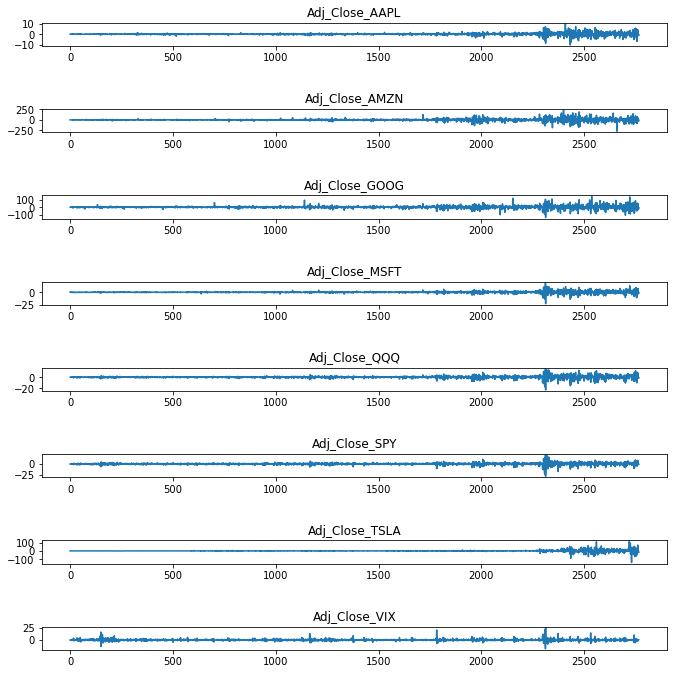

In [95]:
fig = plt.figure(figsize=(8,6))
fig.set_size_inches(1000, 1000)
results_VAR_diff.plot()
plt.tight_layout(pad = 3.0)

#### VAR Forecast - First-Differenced Data

<Figure size 72000x72000 with 0 Axes>

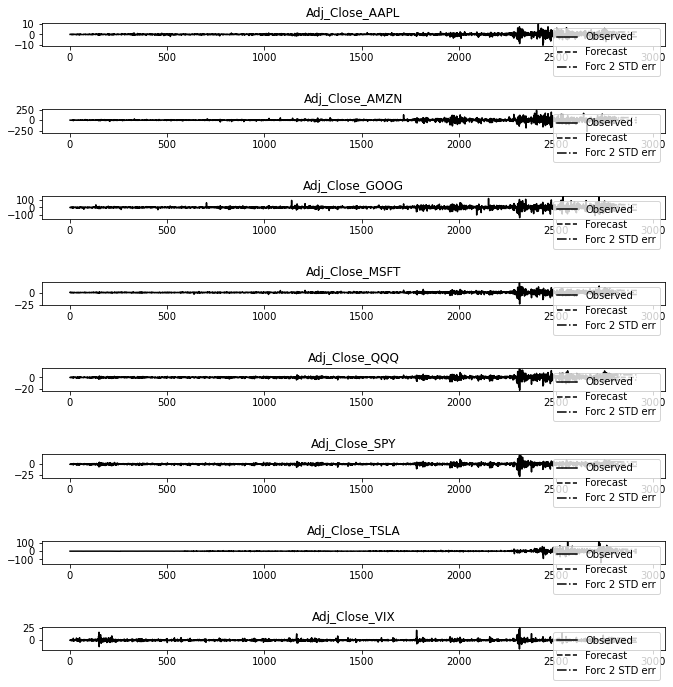

In [97]:
fig = plt.figure(figsize=(8,6))
fig.set_size_inches(1000, 1000)
results_VAR_diff.plot_forecast(150)
plt.tight_layout(pad = 3.0)